In [9]:
import fxcmpy 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from pyti.exponential_moving_average import exponential_moving_average as ema

In [80]:
con = fxcmpy.fxcmpy(config_file='fxcm.cfg')

In [127]:
df = con.get_candles(instrument='EUR/USD', period = 'H1', start = dt.datetime(2016, 1, 1), end = dt.datetime(2017, 6, 10))

In [128]:
df.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2016-01-03 19:00:00,1.08625,1.08551,1.08566,1.08533,1.08683,1.08659,1.08659,1.08585,47
2016-01-03 20:00:00,1.08551,1.08546,1.08561,1.08541,1.08659,1.08639,1.08668,1.08627,65
2016-01-03 21:00:00,1.08546,1.08726,1.08804,1.08546,1.08639,1.08755,1.08841,1.08639,527
2016-01-03 22:00:00,1.08726,1.08658,1.08725,1.08654,1.08755,1.08681,1.08798,1.08678,976
2016-01-03 23:00:00,1.08658,1.08509,1.08659,1.08445,1.08681,1.08527,1.08681,1.08464,6121


In [129]:
# Set Paramters 
pip_cost = .0879 
lot_size = 1
ema_fast = 12 
ema_slow = 20 

In [130]:
from scipy.signal import savgol_filter

In [131]:
df['ema_fast'] = ema(df['askclose'], ema_fast)
df['ema_slow'] = ema(df['askclose'], ema_slow)
df['savgl_41'] = savgol_filter(df['askclose'], window_length=41, polyorder=3)
df['savgl_81'] = savgol_filter(df['askclose'], window_length=81, polyorder=3)

C:\Users\Jameel\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [132]:
df['position'] = np.where(df['savgl_41'] > df['savgl_81'],1,-1)

In [133]:
# df['position'] = np.where(df['ema_fast'] < df['ema_slow'],-1,0)

In [138]:
df['signal'] = df['position'].diff()/2

In [139]:
df[0:45]

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,ema_fast,ema_slow,savgl_41,savgl_81,position,signal
date,,,,,,,,,,,,,,,
2016-01-03 19:00:00,1.08625,1.08551,1.08566,1.08533,1.08683,1.08659,1.08659,1.08585,47,NaN,NaN,1.085307,1.087028,-1,NaN
2016-01-03 20:00:00,1.08551,1.08546,1.08561,1.08541,1.08659,1.08639,1.08668,1.08627,65,NaN,NaN,1.085973,1.087271,-1,0.0
2016-01-03 21:00:00,1.08546,1.08726,1.08804,1.08546,1.08639,1.08755,1.08841,1.08639,527,NaN,NaN,1.086554,1.087473,-1,0.0
2016-01-03 22:00:00,1.08726,1.08658,1.08725,1.08654,1.08755,1.08681,1.08798,1.08678,976,NaN,NaN,1.087053,1.087637,-1,0.0
2016-01-03 23:00:00,1.08658,1.08509,1.08659,1.08445,1.08681,1.08527,1.08681,1.08464,6121,NaN,NaN,1.087473,1.087763,-1,0.0
2016-01-04 00:00:00,1.08509,1.08446,1.08570,1.08425,1.08527,1.08463,1.08586,1.08441,5951,NaN,NaN,1.087818,1.087852,-1,0.0
2016-01-04 01:00:00,1.08446,1.08591,1.08609,1.08262,1.08463,1.08608,1.08627,1.08279,10864,NaN,NaN,1.088091,1.087907,1,1.0
2016-01-04 02:00:00,1.08591,1.08707,1.08749,1.08577,1.08608,1.08723,1.08766,1.08594,11286,NaN,NaN,1.088295,1.087928,1,0.0
2016-01-04 03:00:00,1.08707,1.08704,1.08721,1.08662,1.08723,1.08720,1.08739,1.08678,5387,NaN,NaN,1.088433,1.087917,1,0.0


In [141]:
df['pip_difference'] = (df['askclose'] - df['askopen']) * 10000

In [142]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

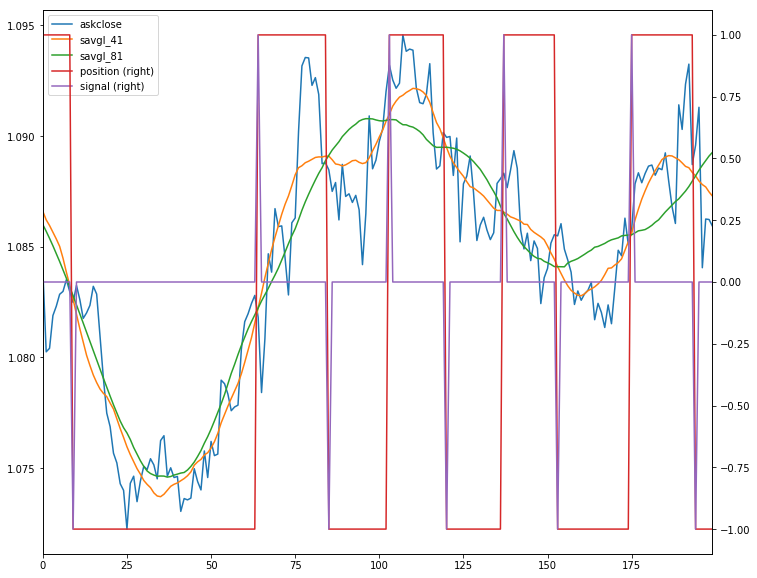

In [146]:
df[['askclose', 'savgl_41', 'savgl_81', 'position', 'signal']][0:200].plot(secondary_y=['position', 'signal'], figsize=(12, 10))
# plt.plot(df['signal'])

In [158]:
returns_long = 0
CountPL_long = False
returns_short = 0
CountPL_short = False

for i, row in df.iterrows():
    if CountPL_long==True:
        returns_long += (row['pip_difference'] * pip_cost * lot_size)
        df.loc[i,'total_long'] = returns_long
    else:
        df.loc[i,'total_long'] = returns_long
        
    if row['position'] == 1:
        CountPL_long=True
        
    elif CountPL_short==True:
        returns_short += (row['pip_difference'] * pip_cost * lot_size)
        df.loc[i,'total_short'] = returns_short
    else:
        df.loc[i,'total_short'] = returns_short
        
    if row['position'] == -1:
        CountPL_short=True

In [162]:
print(returns_long)
print(returns_short)

31.52094000000007
-79.30337999999868


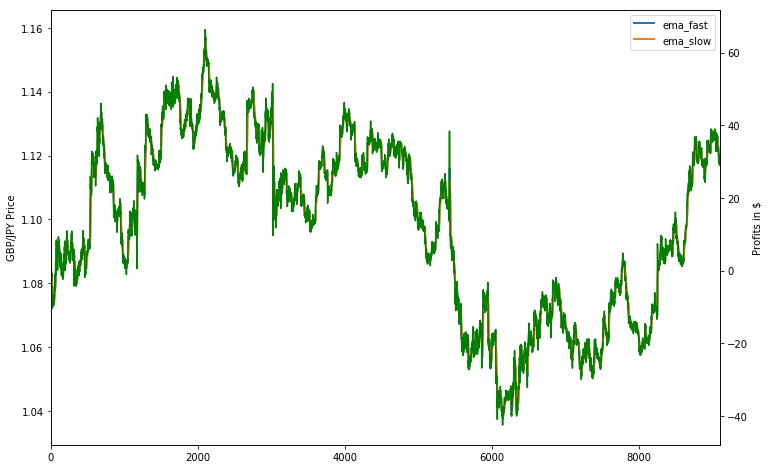

In [161]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111,  ylabel='GBP/JPY Price')
df['askclose'].plot(ax=ax1, color='r', lw=1)
df[['ema_fast', 'ema_slow']].plot(ax=ax1, lw=2)
# ax1.plot(df.loc[df.position == 1.0].index, df.ema_fast[df.position == 1.0],'^', markersize=10, color='m')
# ax1.plot(df.loc[df.position == -1.0].index, df.ema_slow[df.position == -1.0], 'v', markersize=10, color='k')
ax2 = ax1.twinx()
ax2.set_ylabel('Profits in $')
ax2.plot(df['total_longs'], color = 'green')